In [25]:
import numpy as np
import pandas as pd
import os 
import matplotlib.pyplot as plt

In [26]:
df = pd.read_pickle('../../../data/processed/state0/left_android_df.pkl')
print(df.shape)

(162, 7)


In [28]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(df)

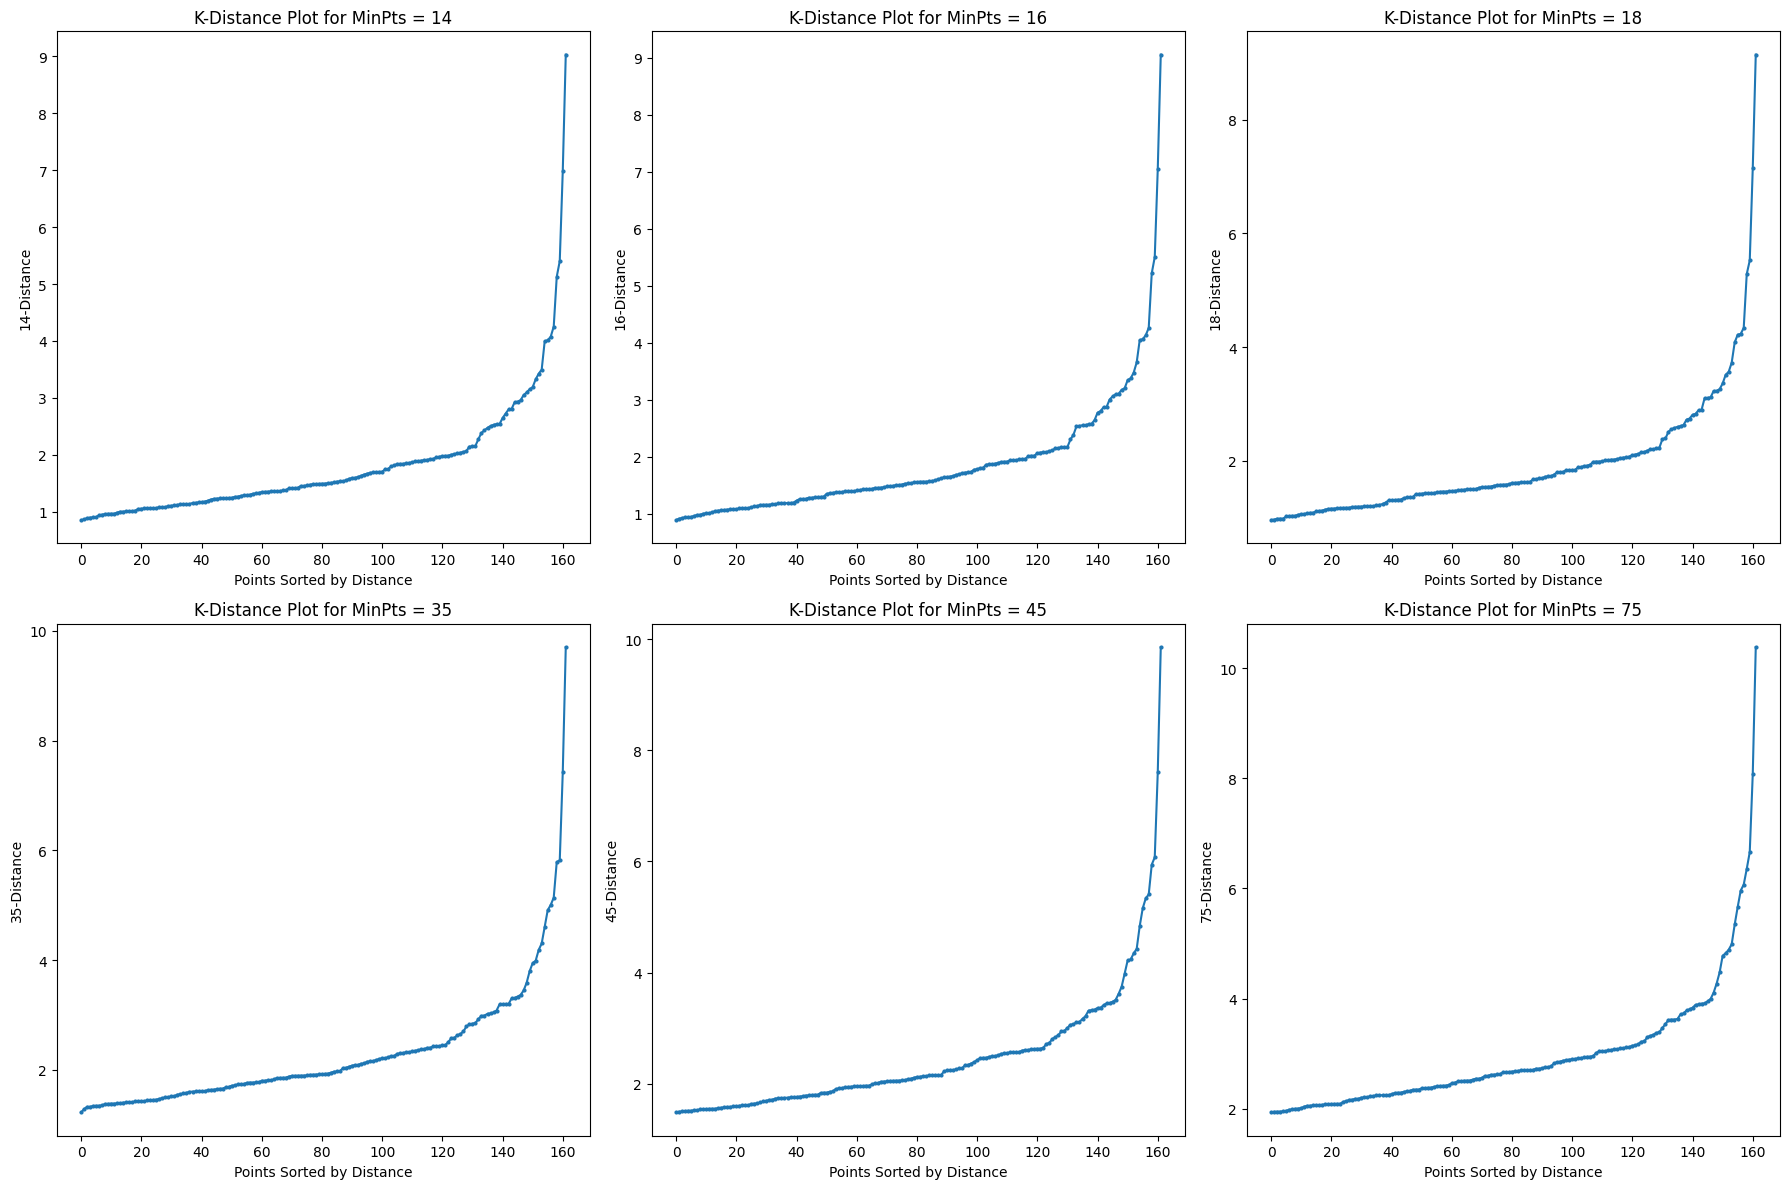

In [29]:
min_pts_candidate = [14, 16, 18, 35, 45, 75]
plt.figure(figsize=(18, 12))

for i, min_pts in enumerate(min_pts_candidate):
    nn = NearestNeighbors(n_neighbors=min_pts, n_jobs=-1).fit(X_scaled)
    distances, indices = nn.kneighbors(X_scaled)

    k_distances = distances[:, min_pts - 1]
    k_distances = np.sort(k_distances, axis=0)
    
    plt.subplot(2, 3, i + 1)
    plt.plot(k_distances, marker='o', markersize=2)
    
    plt.title(f'K-Distance Plot for MinPts = {min_pts}')
    plt.xlabel('Points Sorted by Distance')
    plt.ylabel(f'{min_pts}-Distance')
    
    
plt.tight_layout()
plt.show()

In [32]:
results = []
N_total = X_scaled.shape[0]

for min_pts in range(4, 74, 2):
    for eps in np.arange(0.2, 2, 0.1):
        db = DBSCAN(eps=eps, min_samples=min_pts, n_jobs=-1).fit(X_scaled)
        labels = db.labels_
        
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = np.sum(labels == -1)
        noise_pct = (n_noise / N_total) * 100
        
        if n_clusters >= 2:
            sil_score = silhouette_score(X_scaled, labels)
        else:
            sil_score = -1

        results.append({
            'MinPts': min_pts,
            'Epsilon': eps,
            'N_Clusters': n_clusters,
            'Noise_Pct': f'{noise_pct:.2f}%',
            'Silhouette_Score': sil_score
        })

results_df = pd.DataFrame(results).sort_values(by=['N_Clusters', 'Noise_Pct'], ascending=[False, True])
results_df['Noise_Num'] = results_df['Noise_Pct'].str.replace('%', '').astype(float)
filtered_results = results_df[results_df['Noise_Num'] <= 15.0]
print(filtered_results.drop(columns=['Noise_Num']).head(30))

     MinPts  Epsilon  N_Clusters Noise_Pct  Silhouette_Score
35        6      1.9           1    10.49%              -1.0
34        6      1.8           1    11.11%              -1.0
53        8      1.9           1    11.73%              -1.0
52        8      1.8           1    12.35%              -1.0
71       10      1.9           1    12.35%              -1.0
15        4      1.7           1    12.96%              -1.0
33        6      1.7           1    13.58%              -1.0
89       12      1.9           1    13.58%              -1.0
107      14      1.9           1    13.58%              -1.0
125      16      1.9           1    13.58%              -1.0
14        4      1.6           1    14.20%              -1.0
32        6      1.6           1    14.20%              -1.0
51        8      1.7           1    14.20%              -1.0
70       10      1.8           1    14.20%              -1.0
88       12      1.8           1    14.20%              -1.0
143      18      1.9    